In [5]:
library(car)
library(reshape2)
library(ggplot2)

In [34]:
?read.csv

In [35]:
crime_df = read.csv('crime_v2.csv', header='TRUE')

ERROR: Error in !header: invalid argument type


In [36]:
summary(crime_df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [37]:
str(crime_df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [33]:
length(crime_df$county)

[1] 97

In [28]:
as.double(as.character(crime_df$prbconv))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 0.5275960 1.4814800 0.2678570 0.5254240 0.4765630 0.0683761 0.5206070
 [8] 0.7692310 0.4364410 1.2256100 0.3347010 0.4037800 0.4067800 0.3529410
[15] 0.5154640 0.3253010 0.3854960 0.9729730 0.4528300 0.4505670 0.7633330
[22] 0.3718790 0.2598330 0.1403510 0.2078310 0.7369090 0.6225170 0.4934380
[29] 0.4592160 0.1544520 0.2482760 0.7393940 0.2295900 0.5283020 0.3084110
[36] 0.2037250 0.4572100 0.5490200 0.5484950 0.3869260 0.5899050 0.5739440
[43] 0.5950780 1.2343800 0.5714290 0.3842360 0.3643530 0.7816090 0.5223880
[50] 0.2203390 1.5000000 0.7932330 0.3478000 0.2263610 0.4389610 1.3581400
[57] 0.3934130 0.4955750 0.2719470 0.4777330 1.0689700 0.2894740 0.4126980
[64] 0.3146070 0.3404910 0.4267780 1.0153800 0.3601530 0.5207100 0.5598230
[71] 0.4436810 0.4929400 0.5081970 0.4011980 0.4685310 0.3225810 0.7229730
[78] 0.9090910 0.3278690 0.4105960 0.3286640 0.3430230 0.3819080 2.1212101
[85] 0.4431140 0.3005780 0.4500000 0.5888590 0.5888590 1.6705199 1.1829300
[92]        NA        NA        NA        NA        NA        NA

In [31]:
summary(crime_df$prbconv)

` 0.068376102 0.140350997 0.154451996 0.203724995 
          5           1           1           1           1           1 
0.207830995    0.220339 0.226361006 0.229589999 0.248275995 0.259833008 
          1           1           1           1           1           1 
0.267856985 0.271946996  0.28947401 0.300577998 0.308411002 0.314606994 
          1           1           1           1           1           1 
0.322580993 0.325300992 0.327868998 0.328664005 0.334701002 0.340490997 
          1           1           1           1           1           1 
0.343023002 0.347799987 0.352941006  0.36015299 0.364353001 0.371879011 
          1           1           1           1           1           1 
   0.381908 0.384236008 0.385495991 0.386925995 0.393413007    0.401198 
          1           1           1           1           1           1 
0.403780013 0.406780005 0.410596013 0.412698001 0.426777989 0.436441004 
          1           1           1           1           1           1 
0.438960999 0.443114012 0.443681002 0.449999988 0.450567007 0.452829987 
          1           1           1           1           1           1 
0.457210004 0.459215999 0.468531013 0.476563007 0.477732986 0.492940009 
          1           1           1           1           1           1 
0.493438005 0.495575011  0.50819701 0.515464008 0.520606995 0.520709991 
          1           1           1           1           1           1 
0.522387981 0.525424004 0.527595997 0.528302014 0.548494995 0.549019992 
          1           1           1           1           1           1 
0.559822977 0.571429014 0.573943973 0.588859022 0.589905024 0.595077991 
          1           1           1           2           1           1 
 0.62251699 0.722972989 0.736908972 0.739394009 0.763333023 0.769231021 
          1           1           1           1           1           1 
0.781608999 0.793232977 0.909090996 0.972972989 1.015380025 1.068969965 
          1           1           1           1           1           1 
1.182929993 1.225610018 1.234380007 1.358139992 1.481480002         1.5 
          1           1           1           1           1           1 
1.670519948 2.121210098 
          1           1

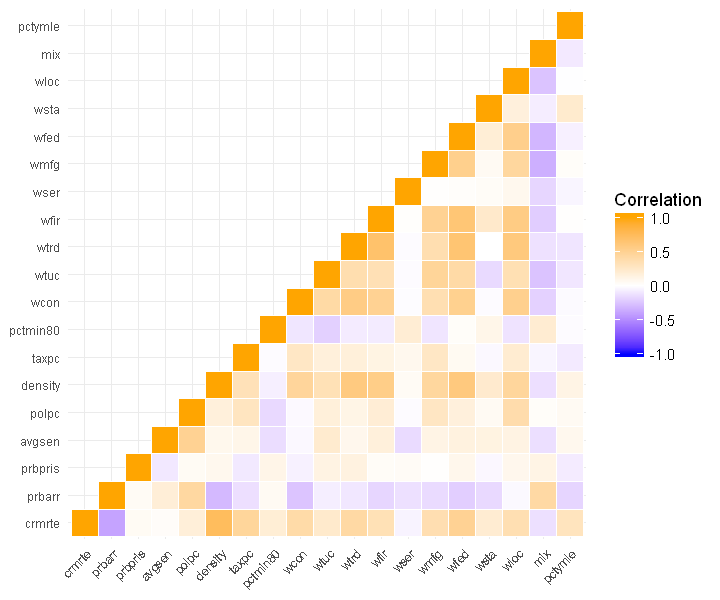

In [39]:
options(repr.plot.width=6, repr.plot.height=5)
#correlation matrix for top 4 correlation and bottom 4 correlation
cor_dr = cor(crime_df[c('crmrte',
                        'prbarr',
                        'prbpris',
                        'avgsen',
                        'polpc',
                        'density',
                        'taxpc',
                        'pctmin80',
                        'wcon',
                        'wtuc',
                        'wtrd',
                        'wfir',
                        'wser',
                        'wmfg',
                        'wfed',
                        'wsta',
                        'wloc',
                        'mix',
                        'pctymle')],
              use = "complete.obs")


# Get upper triangle of the correlation matrix
lower_tri = function(data){data[lower.tri(data)]<- NA 
                           return(data)}

# Heatmap
ggplot(data = melt(lower_tri(cor_dr), na.rm = TRUE),
       aes(Var2, Var1, fill = value))+
theme_minimal()+ 
geom_tile(color = 'white')+
scale_fill_gradient2(low = 'blue',
                     high = "orange",
                     mid = 'white', 
                     midpoint = 0,
                     limit = c(-1,1),
                     name= 'Correlation')+
theme(axis.text.x = element_text(angle=45,
                                 vjust = 1,
                                 size =7,
                                 hjust = 1),
     axis.text.y = element_text(size=7),
     axis.title.x=element_blank(),
     axis.title.y=element_blank())

# Research Question
1. You should aim for causal estimates, while clearlyexplaining how you think omitted variables may affect your conclusions.

# Goals